In [1]:
import numpy as np
import CADMium as cad
import matplotlib.pyplot as plt

In [2]:
#Distance of the nuclei from grid center
#a = 4.522/2 %LDA Equilibrium
#a = 5.1967  %PBE Equilibrium
a = 3

#Nuclear charge for fragments A and B
Za = 4
Zb = 4

#Set Polarization: Pol=1 -> Unpolarized. Pol=2 -> Polarized
pol = 1

#Number of molecular orbitals per type of electron
Nmo_a = [[2]]
Nmo_b = [[2]]

#Number of electrons per type of electrons
N_a   = [[4]] 
N_b   = [[4]]

#Molecular electron configuration
Nmo = [[4]]
N   = [[8]]

#Ensemble Mix
nu_a = 1 
nu_b = 1

NP = 5
NM = [4,4]
L = np.arccosh(15/a)
loc = np.array(range(-4,5))

grid = cad.Psgrid(NP, NM, a, L, loc )
grid.initialize()

 Constructing integration weights ... 

 Building finite difference opperators ... 

 Factorizing Laplacian ... 

 Done


In [3]:
part = cad.Partition( grid, Za, Zb, pol, Nmo_a, N_a, nu_a, Nmo_b, N_b, nu_b, {"kinetic_part_type" : "inversion",
                                                                             "k_family"           : 'lda', 
                                                                             "ke_func_id"         : 50, 
                                                                             "interaction_type"   : 'dft',
                                                                             "AB_SYM"             : True,})
#Solver for Full Molecule
mol_solver = cad.Pssolver( grid, Nmo, N,  {"iter_lin_solver" : True,
                                           "Tol_orbital"     : 1e-10,
                                           "Tol_lin_solver"  : 1e-4
                                            })
#Feed invertert object to partition. 
#Probably should default this
part.inverter = cad.Inverter(grid, mol_solver, { "invert_type"     : 'orbitalinvert', 
                                                 "use_iterative"   : False,
                                                 "tol_lin_solver"  : 1e-3,
                                                 "tol_Invert"      : 1e-9,
                                                 "max_iter_invert" : 50,
                                                 "res_factor"      : 0,
                                                 "ab_sym"          : True,
                                                 "disp"            : False,
                                                })

#Run the scf calculation isolated
# part.ISOLATED = True

part.optPartition.isolated = True

part.scf({"Alpha" : [0.6],
          "DISP" : True,
          "e_tol" : 1e-6, 
          "ITERATIVE" : False})




In [4]:
#Run the Full PDFT Calculation
part.optPartition.isolated = False


part.scf({"disp"       : True,
          "alpha"      : [0.3],
          "e_tol"      : 1e-6,
          "continuing" : True, 
          "iterative"  : False,
          "max_iter"   : 100})

In [6]:
part.E.__dict__
#Like wtf why is EP zero?

mappingproxy({'__module__': 'CADMium.partition.partition',
              '__dict__': <attribute '__dict__' of 'E' objects>,
              '__weakref__': <attribute '__weakref__' of 'E' objects>,
              '__doc__': 'E()',
              '__dataclass_params__': _DataclassParams(init=True,repr=True,eq=True,order=False,unsafe_hash=False,frozen=False),
              '__dataclass_fields__': {},
              '__init__': <function CADMium.partition.partition.__create_fn__.<locals>.__init__(self) -> None>,
              '__repr__': <function CADMium.partition.partition.__create_fn__.<locals>.__repr__(self)>,
              '__eq__': <function CADMium.partition.partition.__create_fn__.<locals>.__eq__(self, other)>,
              '__hash__': None,
              'Ea': -14.573518053820795,
              'Eb': -14.573518053820795,
              'Ef': -29.14703610764159,
              'Tsf': 29.73754119181355,
              'Eksf': array([[-16.36639367]]),
              'Enucf': -68.086136313275

In [7]:
full, x,y = grid.plotter(part.V.vp[:,0] + part.V.vp[:,1])
x_axis,vp = grid.axis_plot(part.V.vp[:,0] + part.V.vp[:,1])

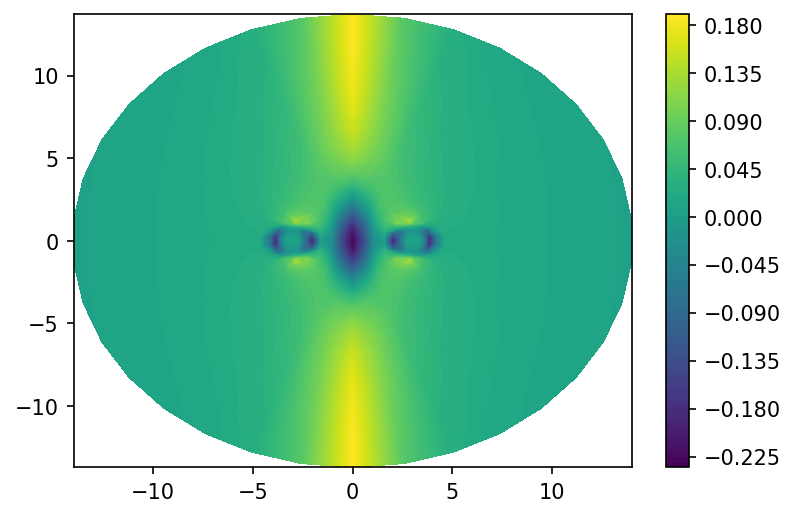

In [8]:
fig = plt.figure(dpi=150)
plt.contourf(x,y,full, levels=100, cmap="viridis")
# plt.xlim([-2,2])
# plt.ylim([-2,2])
plt.colorbar()

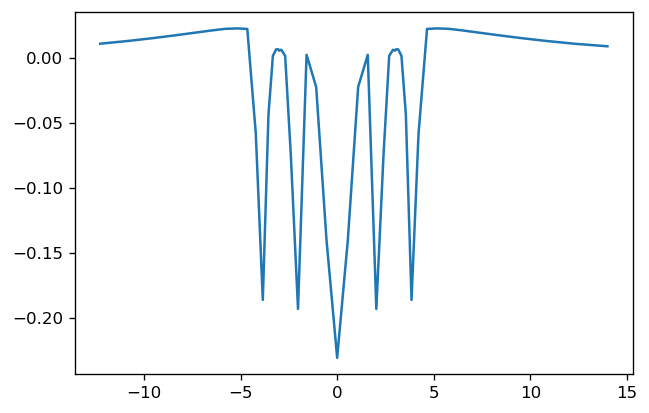

In [9]:
fig = plt.figure(dpi=120)
plt.plot(x_axis,vp)
# plt.xlim([0,6])
# plt.ylim([-5,1])